# Multiclass Perceptron

## Task I: Load in the datasets


## Task II: Implement the multiclass perceptron


## Task III: Set	 the	learning	rate	η to .09,	and	train	 the	multiclass	perceptron	on	the	provided training	data.	After	processing	every	5 training	data	points	(also	known	as	a mini-batch),	evaluate	 the	 error	 of	 the	 current	model	 on	 the test	 data.	 Plot the	 error	 of the	 test	 data	 vs	 the	 number	 of	mini-batches,	and	include	it	in	your	Jupyter	Notebook	file	for	Question 6.		

In [17]:
#importing libraries
library(reshape2)
library(ggplot2)

In [18]:
#setting the seed and learning rate
set.seed(1994)
learningRate = 0.09

#Reading in the train and test data
test <- read.csv('Task1D_test.csv')
train <- read.csv('Task1D_train.csv')

In [19]:
#Creating the train length, data and label
train.len = nrow(train)
train.label = train[,5]
train.data = train[-5]

test.len = nrow(test)
test.label = test[,5]
test.data = test[-5]

In [20]:
#creating vectors for the inputs, 1 for the intercept
Phi <- as.matrix(cbind(1, train.data))
Phi1 <- as.matrix(cbind(1, test.data))

#creating matrix of weights, giving it random starting points
weightName  = c("C1","C2","C3")
weights = matrix(runif(length(weightName)*ncol(Phi)),nrow=length(weightName))
rownames(weights) = weightName

#looking at the initial weights
weights

C1,0.09899234,0.9571959,0.9190347,0.36910485,0.7903136
C2,0.78286052,0.9554693,0.9468432,0.09016355,0.5422118
C3,0.61363712,0.2183221,0.5394719,0.92600202,0.4579380


In [21]:
#empty vectors to store errors
error = c()
errorTest = c()

## Implementation of the Algorithm

In [22]:
#function to get the total number of mis classifications for test data set (to be used for mini batches)
getMissFire <- function(test,weights,weightName,Phi1,test.label)
{
    #random indexes for the data points
    test.index <- sample(1:nrow(test), replace = FALSE)
    
    #data points of this random indexes
    Phi1 <- Phi1[test.index,]
    test.label <- test.label[test.index]
    
    #Initially setting the miss classification to 0
    theMiss=0;
    for (i in 1:nrow(test))
    {
        #initially argmax to 0
        theMax = 0;
        
        #the correct class
        theCorrect = toString(test.label[i]);
        
        #looping 3 times cause 3 classess
        for (j in 1:3)
        {
            #dot product of the weights with the data point
            theMagnitude = weights[j,]%*%Phi1[i,]
            
            #setting the max magnitude as the argmax
            if(theMagnitude>theMax)
            {
                theMax = theMagnitude
                theClass = j
            }
        }
        #checking if the class was correctly predited, adding total misclassification to the tally
        thePredict = toString(weightName[theClass]);
        if(thePredict != theCorrect)
        {
            theMiss = theMiss + 1;
        }
    }
    #returning miss classification
    return (theMiss)
}

In [23]:
#The main loop that updates the weights and checks for the missclassification of the mini batches.

#Setting initital loop count and the loop termination condition
terminate = 0;
iterations =0;
while(terminate!=1)
{
    #random indexes for the data points
    train.index <- sample(1:nrow(train), replace = FALSE)
    
    #data points of this random indexes
    Phi <- Phi[train.index,]
    train.label <- train.label[train.index]
    
    theMiss=0;
    for (i in 1:nrow(train))
    {
        #after 5 data points checking the missclassification for the test data set according to
        #the current weights of the 3 classess
        if(i%%5==0)
        {
         #function to get total miss classification for the test data
         theX = getMissFire (test,weights,weightName,Phi1,test.label)
         #adding the error to the empty list   
         errorTest = c(errorTest,theX)
        }
        #initially argmax to 0
        theMax = 0;
        
        #the correct class
        theCorrect = toString(train.label[i]);
        
        #looping 3 times cause 3 classess
        for (j in 1:3)
        {
            #dot product of the weights with the data point
            theMagnitude = weights[j,]%*%Phi[i,]
            
            #setting the max magnitude as the argmax
            if(theMagnitude>theMax)
            {
                theMax = theMagnitude
                theClass = j
            }
        }
        thePredict = toString(weightName[theClass]);
        
        #checking if predition was not correct
        if(thePredict != theCorrect)
        {
            #if not correct update the weights of the wrong and the correct class
            #Increasing the miss classfication iterator
            theMiss = theMiss + 1;
            weights[thePredict,] = weights[thePredict,] - learningRate*Phi[i,];
            weights[theCorrect,] = weights[theCorrect,] + learningRate*Phi[i,];
        }
    }
    #appending results to the error vector
    error = c(error,theMiss)
    iterations = iterations +1
    
    #Once miss classification of the testing data set are 0, break the loop
    if(theMiss==0)
    {
        terminate =1;
    }
    #slowly decrease the learning rate each iteration
    learningRate = learningRate*0.99;
}

In [24]:
#total iteration until miss classification is zero
iterations

[1] 84

In [25]:
#final weights
weights

C1,0.7471721,2.429965,4.475077,-4.149312,-1.747556
C2,2.1706447,2.935883,1.375048,-1.175403,-3.100336
C3,-1.4223268,-3.234861,-3.444775,6.709985,6.638356


## Vizulizations

## Train Data

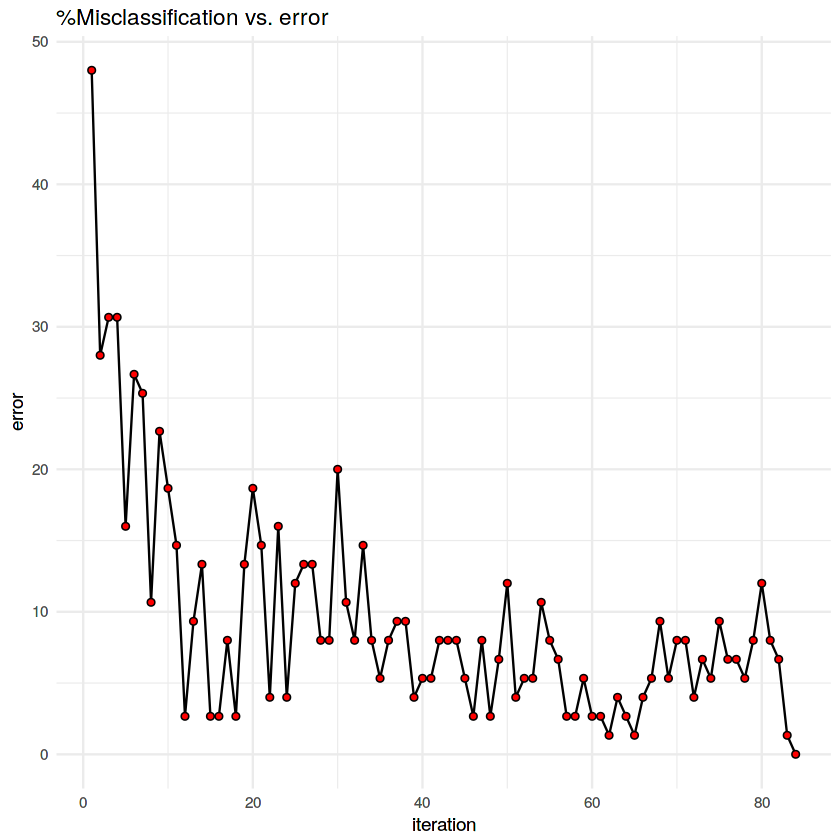

In [26]:
#Data frame for the training error
out <- data.frame('Iteration'= 1:length(error))
out$error <- (error/nrow(train))*100

#using melt function for vizulization
out.m <- melt(out, id=c('Iteration', 'error'))
names(out.m) <- c('iteration', 'error')

#plot of the missclassifications vs the the total iteration
ggplot(data=out.m,aes(x=iteration, y=error)) + geom_line() + geom_point(shape=21, fill='red')  +
    ggtitle('%Misclassification vs. error') + theme_minimal()

## Test Data

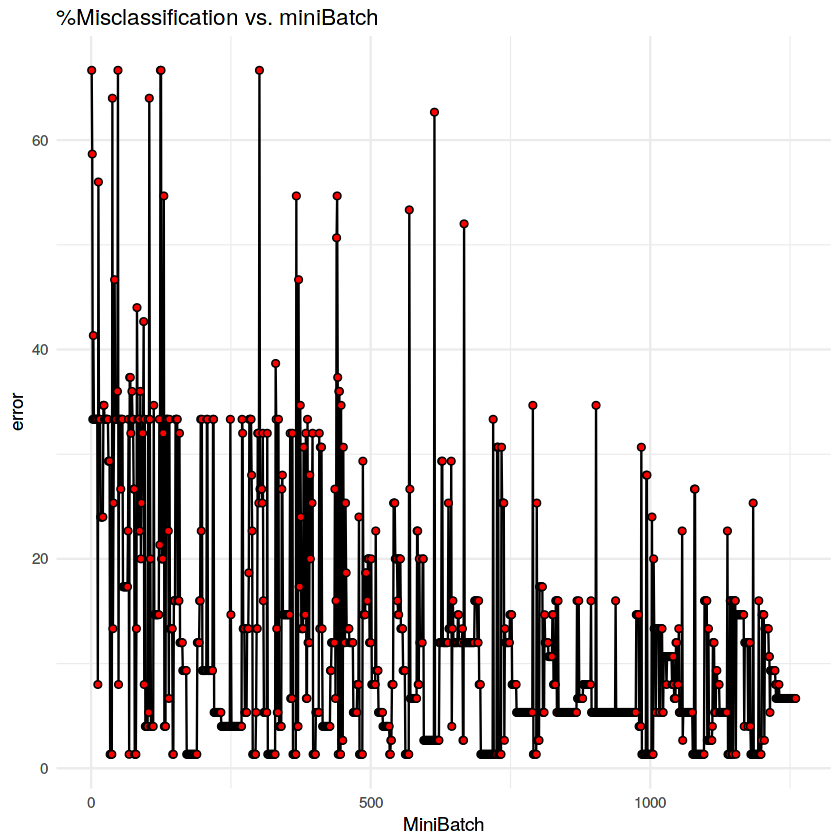

In [28]:
#Data frame for the training error
out1 <- data.frame('Iteration'= 1:length(errorTest))
out1$error <- (errorTest/nrow(train))*100

#using melt function for vizulization
out1.m <- melt(out1, id=c('Iteration', 'error'))
names(out1.m) <- c('MiniBatch', 'error')

#plot of the missclassifications vs the the total iteration
ggplot(data=out1.m,aes(x=MiniBatch, y=error)) + geom_line() + geom_point(shape=21, fill='red')  +
    ggtitle('%Misclassification vs. miniBatch') + theme_minimal()